<a href="https://colab.research.google.com/github/rajkonkret/bootcamp_16_11_excel/blob/main/excel_zad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadania z pracy z Excelem
<h1>TST</h1>


In [1]:
print("Radek")

Radek


In [2]:
a = 100

In [3]:
a

100

In [6]:
from openpyxl import Workbook
wb = Workbook()

ws = wb.active
ws['A1'] = 42
ws.append([1, 2, 3])

import datetime

ws['A3'] = datetime.datetime.now()
wb.save("sample.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

wczytanie pliku excel

In [91]:
import openpyxl

wb = openpyxl.load_workbook('videogamesales.xlsx')

In [13]:
wb

ctrl shift enter - uruchomienie kodu w komórce

In [14]:
ws = wb.active

In [15]:
ws

<Worksheet "vgsales">

In [90]:
ws = wb['vgsales']

TypeError: list indices must be integers or slices, not str

In [18]:
print('Total number of rows: ' + str(ws.max_row) + ' Total number of columns: ' + str(ws.max_column))

Total number of rows: 16328 Total number of columns: 10


In [20]:
print('The value in cell A1 is: ' + ws['A1'].value)

The value in cell A1 is: Rank


In [25]:
values = [ws.cell(row=1, column=i).value for i in range(1, ws.max_column + 1)]
print(values)

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


In [26]:
data = [ws.cell(row=i, column=2).value for i in range(2, 12)]
print(data)

['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt']




```
Wii Sports
Super Mario Bros.
Mario Kart Wii
Wii Sports Resort
Pokemon Red/Pokemon Blue
Tetris
New Super Mario Bros.
Wii Play
New Super Mario Bros. Wii
Duck Hunt

```



In [29]:
my_list = list()

for value in ws.iter_rows(
    min_row=1, max_row=11, min_col=1, max_col=6,
    values_only=True):
    my_list.append(value)

print(my_list)
for ele1, ele2, ele3, ele4, ele5, ele6 in my_list:
    print(f"{ele1:<8}{ele2:<35}{ele3:<10}{ele4:<10}{ele5:<15}{ele6:<15}")

[('Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher'), (1, 'Wii Sports', 'Wii', 2006, 'Sports', 'Nintendo'), (2, 'Super Mario Bros.', 'NES', 1985, 'Platform', 'Nintendo'), (3, 'Mario Kart Wii', 'Wii', 2008, 'Racing', 'Nintendo'), (4, 'Wii Sports Resort', 'Wii', 2009, 'Sports', 'Nintendo'), (5, 'Pokemon Red/Pokemon Blue', 'GB', 1996, 'Role-Playing', 'Nintendo'), (6, 'Tetris', 'GB', 1989, 'Puzzle', 'Nintendo'), (7, 'New Super Mario Bros.', 'DS', 2006, 'Platform', 'Nintendo'), (8, 'Wii Play', 'Wii', 2006, 'Misc', 'Nintendo'), (9, 'New Super Mario Bros. Wii', 'Wii', 2009, 'Platform', 'Nintendo'), (10, 'Duck Hunt', 'NES', 1984, 'Shooter', 'Nintendo')]
Rank    Name                               Platform  Year      Genre          Publisher      
1       Wii Sports                         Wii       2006      Sports         Nintendo       
2       Super Mario Bros.                  NES       1985      Platform       Nintendo       
3       Mario Kart Wii                     Wii       2008

In [30]:
ws['K1'] = "Sum of Sales"

In [31]:
ws['K1'].value

'Sum of Sales'

In [32]:
ws.cell(row=1, column=11, value="Sum of Sales")

<Cell 'vgsales'.K1>

In [38]:
print(ws.cell(row=1, column=11).value)

Sum of Sales


In [39]:
ws['K1'].value

'Sum of Sales'

In [40]:
wb.save('videogamesales.xlsx')

Dodanie kolumny - suma sprzedazy

In [41]:
row_position = 2
col_position = 7

total_sales = ((ws.cell(row=row_position, column=col_position).value) +
              (ws.cell(row=row_position, column=col_position+1).value) +
               (ws.cell(row=row_position, column=col_position+2).value) +
               (ws.cell(row=row_position, column=col_position+3).value))

ws.cell(row=2, column=11).value = total_sales
wb.save('videogamesales.xlsx')

In [43]:
row_position = 1
for i in range(1, ws.max_row):

    row_position += 1
    NA_Sales = ws.cell(row=row_position, column=7).value
    EU_Sales = ws.cell(row=row_position, column=8).value
    JP_Sales = ws.cell(row=row_position, column=9).value
    Other_Sales = ws.cell(row=row_position, column=10).value

    total_sales = (NA_Sales + EU_Sales + JP_Sales + Other_Sales)
    ws.cell(row=row_position, column=11).value = total_sales


wb.save('videogamesales.xlsx')


dodanie wiersza

In [44]:
new_row = (1, 'The Legend of Zelda', 1986, 'Action', 'Nintendo', 3.74, 0.93, 1.69, 0.14, 6.51, 6.5)
ws.append(new_row)

wb.save('videogamesales.xlsx')

In [45]:
values = [ws.cell(row=ws.max_row, column=i).value for i in range(1, ws.max_column+1)]
print(values)

[1, 'The Legend of Zelda', 1986, 'Action', 'Nintendo', 3.74, 0.93, 1.69, 0.14, 6.51, 6.5]


Usunięcie wiersza

In [46]:
ws.delete_rows(ws.max_row, 1)
wb.save('videogamesales.xlsx')

AVERAGE - obliczenie średniej

In [51]:
ws['P1'] = "Average Sales"
ws['P2'] = '= AVERAGE(K2:K16220)'

wb.save('videogamesales.xlsx')

COUNTA - zlicza komórki (niepuste)

In [53]:
ws['Q1'] = "Number of Populated Cells"
ws['Q2'] = '=COUNTA(E2:E16220)'

wb.save('videogamesales.xlsx')

COUNTIF - liczy spełniające warunek

In [55]:
ws['R1'] = "Number of Rows with Sports Genre"
ws['R2'] = '=COUNTIF(E2:E16220, "Sports")'

wb.save('videogamesales.xlsx')

SUMIF - sumuje spełniające warunek

In [57]:
ws['S1'] = 'Total Sports Sales'
ws['S2'] = '=SUMIF(E2:E16220, "Sports", K2:K16620)'

wb.save('videogamesales.xlsx')

CEILING - zaokraglenie

In [58]:
ws['T1'] = "Rounded Sum of Sports Sales"
ws['T2'] = '=CEILING(S2,25)'

wb.save('videogamesales.xlsx')

In [59]:
print(ws.title)

vgsales


In [60]:
ws.title = 'Video Games Sales Data'
wb.save('videogamesales.xlsx')

In [61]:
print(wb.sheetnames)

['Video Games Sales Data', 'Total Sales by Genre', 'Breakdown of Sales by Genre', 'Breakdown of Sales by Year']


dodanie arkusza

In [65]:
wb.create_sheet('Empty Sheet')
print(wb.sheetnames)

wb.save('videogamesales.xlsx')

['Video Games Sales Data', 'Total Sales by Genre', 'Breakdown of Sales by Genre', 'Breakdown of Sales by Year', 'Empty Sheet']


usunięcie arkusza

In [66]:
wb.remove(wb['Empty Sheet'])
print(wb.sheetnames)

wb.save('videogamesales.xlsx')

['Video Games Sales Data', 'Total Sales by Genre', 'Breakdown of Sales by Genre', 'Breakdown of Sales by Year']


Powielenie arkusza

In [68]:
wb.copy_worksheet(wb['Video Games Sales Data'])
wb.save('vgsales_2.xlsx')

In [69]:
ws = wb['Total Sales by Genre']


wykres słupkowy

In [70]:
from openpyxl.chart import Reference

In [77]:
values = Reference(ws,
                   min_col=2,
                   max_col=2,
                   min_row=1,
                   max_row=13)

In [76]:
cats = Reference(ws,
                 min_col=1,
                 max_col=1,
                 min_row=2,
                 max_row=13)

In [78]:
from openpyxl.chart import BarChart
chart = BarChart()
chart.add_data(values, titles_from_data=True)
chart.set_categories(cats)

chart.title = "Total Sales"
chart.x_axis.title = "Genre"
chart.y_axis.title = "Total Sales by Genre"

ws.add_chart(chart, "D2")

wb.save("videogamesales.xlsx")

In [92]:
ws = wb['Breakdown of Sales by Genre']
values = Reference(ws,
                   min_col=2,
                   max_col=5,
                   min_row=1,
                   max_row=13)

cats = Reference(ws,
                 min_col=1,
                 max_col=1,
                 min_row=2,
                 max_row=13)



In [80]:
chart = BarChart()
chart.add_data(values, titles_from_data=True)
chart.set_categories(cats)

chart.title = "Sales Braekdown"
chart.x_axis.title = "Genre"
chart.y_axis.title = "Brakdown of Sales by Genre"

ws.add_chart(chart, "H2")

wb.save("videogamesales.xlsx")

Wykres liniowy

In [82]:
values = Reference(ws,
                   min_col=2,
                   max_col=6,
                   min_row=1,
                   max_row=40)

cats = Reference(ws, min_col=1, max_col=1, min_row=2, max_row=40)

In [83]:
from openpyxl.chart import LineChart

chart = LineChart()
chart.add_data(values, titles_from_data=True)
chart.set_categories(cats)

chart.title = "Total Sales"
chart.x_axis.title = "Year"
chart.y_axis.title = "Total Sales by  Year"

ws.add_chart(chart, "H2")

wb.save("videogamesales.xlsx")

In [84]:
from openpyxl.styles import Font

In [93]:
ws = wb['Video Games Sales Data']
ws['A1'].font = Font(bold=True, size=12)

wb.save("videogamesales.xlsx")

In [94]:
for cell in ws["1:1"]:
    cell.font = Font(bold=True, size=12)

wb.save("videogamesales.xlsx")

In [95]:
from openpyxl.styles import colors

ws['A1'].font = Font(color='FF0000', bold=True, size=12)  # red
ws['A2'].font = Font(color='0000FF') # blue

wb.save("videogamesales.xlsx")

In [96]:
# zmiana koloru tła w komórce
from openpyxl.styles import PatternFill

ws['A1'].fill = PatternFill('solid', start_color="38e3ff")

wb.save("videogamesales.xlsx")

In [97]:
from openpyxl.styles import Border, Side
my_border = Side(border_style='thin', color="000000")

ws['A1'].border = Border(
    top=my_border, left=my_border, right=my_border, bottom=my_border
)

wb.save("videogamesales.xlsx")

In [99]:
from openpyxl.formatting.rule import CellIsRule

fill = PatternFill(
    start_color='90EE90',
    end_color='90EE90', fill_type='solid')

ws.conditional_formatting.add(
    'G2:K16594', CellIsRule(operator='greaterThan', formula=[8], fill=fill))

wb.save("videogamesales.xlsx")

<h1>Wykresy</h1>

In [1]:
import matplotlib.pyplot as plt

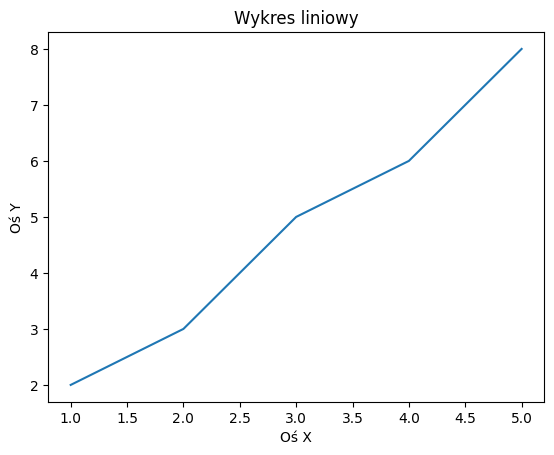

In [2]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5 ,6 , 8]
plt.plot(x, y)
plt.title("Wykres liniowy")
plt.xlabel("Oś X")
plt.ylabel("Oś Y")
plt.show()

In [3]:
import numpy as np

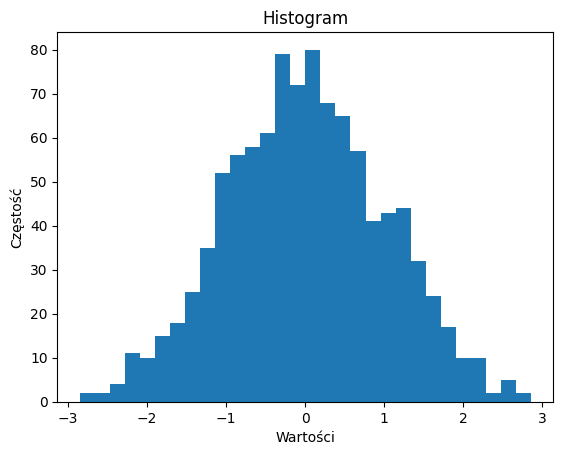

In [8]:
data = np.random.normal(0, 1, 1000)

plt.hist(data, bins=30)
plt.title('Histogram')
plt.xlabel('Wartości')
plt.ylabel('Częstość')

plt.show()

In [9]:
labels = ['Jabłka', "Banany", "Winogorna", "Pomarańcze"]
sizes = [30, 25, 20, 45]
colors = ['red', 'yellow', 'purple', 'orange']

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

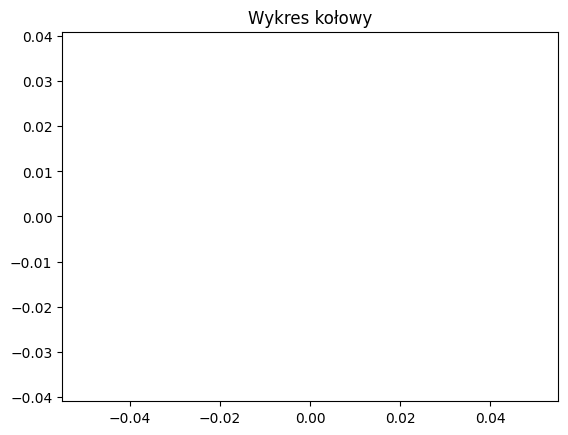

In [10]:
plt.title("Wykres kołowy")
plt.axis('equal')

([<matplotlib.patches.Wedge at 0x7e417a79b610>,
 [Text(0.7778174593052024, 0.7778174593052023, 'Jabłka'),
  Text(-0.6696375582917576, 0.872688684769691, 'Banany'),
  Text(-1.0625184133605794, -0.28470093303274735, 'Winogorna'),
  Text(0.420951775601599, -1.0162674857624154, 'Pomarańcze')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.3652568499773223, 0.47601200987437686, '20.8%'),
  Text(-0.5795554981966796, -0.15529141801786217, '16.7%'),
  Text(0.229610059419054, -0.554327719506772, '37.5%')])

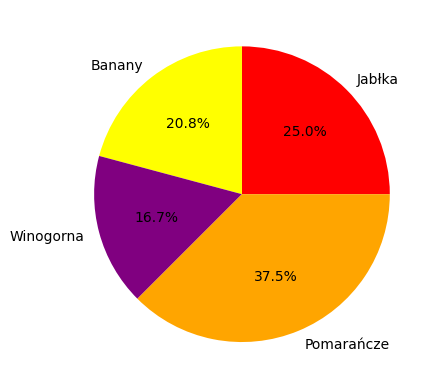

In [11]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7e417a816950>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Jabłka'),
  Text(-0.872688684769691, -0.6696375582917576, 'Banany'),
  Text(0.2847009330327473, -1.0625184133605794, 'Winogorna'),
  Text(1.0162674857624154, 0.42095177560159897, 'Pomarańcze')],
 [Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.47601200987437686, -0.3652568499773223, '20.8%'),
  Text(0.15529141801786214, -0.5795554981966796, '16.7%'),
  Text(0.5543277195067721, 0.22961005941905396, '37.5%')])

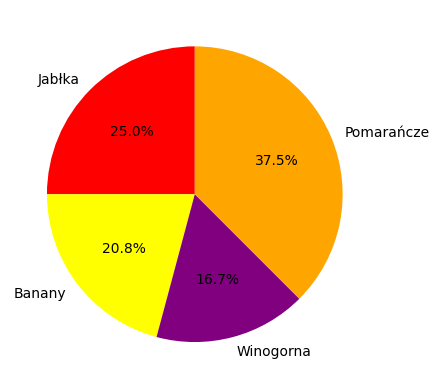

In [12]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x7e417a26ef90>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Jabłka'),
  Text(-0.872688684769691, -0.6696375582917576, 'Banany'),
  Text(0.2847009330327473, -1.0625184133605794, 'Winogorna'),
  Text(1.0162674857624154, 0.42095177560159897, 'Pomarańcze')],
 [Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.47601200987437686, -0.3652568499773223, '20.8%'),
  Text(0.15529141801786214, -0.5795554981966796, '16.7%'),
  Text(0.5543277195067721, 0.22961005941905396, '37.5%')])

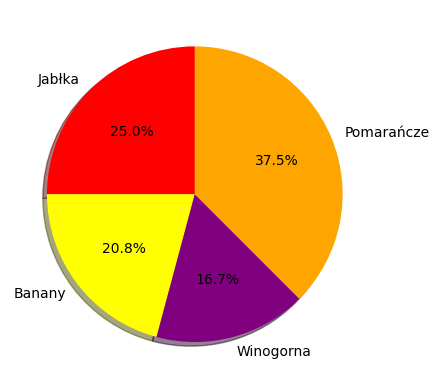

In [13]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

([<matplotlib.patches.Wedge at 0x7e417971e690>,
 [Text(-0.848528137423857, 0.8485281374238571, 'Jabłka'),
  Text(-0.872688684769691, -0.6696375582917576, 'Banany'),
  Text(0.2847009330327473, -1.0625184133605794, 'Winogorna'),
  Text(1.0162674857624154, 0.42095177560159897, 'Pomarańcze')],
 [Text(-0.4949747468305832, 0.4949747468305833, '25.0%'),
  Text(-0.47601200987437686, -0.3652568499773223, '20.8%'),
  Text(0.15529141801786214, -0.5795554981966796, '16.7%'),
  Text(0.5543277195067721, 0.22961005941905396, '37.5%')])

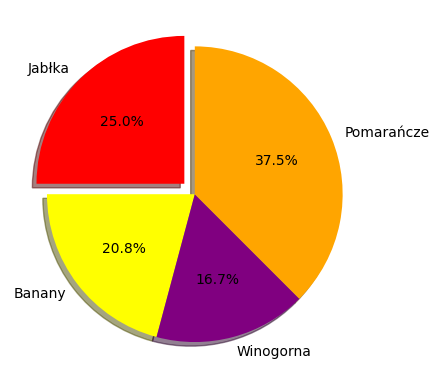

In [14]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0, 0, 0))

In [15]:
labels = ['2016', '2017', '2018', '2019', '2020']
values = [10, 20, 30, 25, 35]

<BarContainer object of 5 artists>

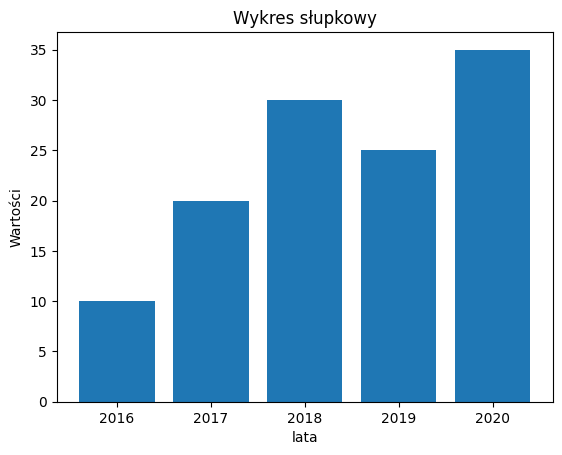

In [17]:
plt.title("Wykres słupkowy")
plt.xlabel('lata')
plt.ylabel('Wartości')
plt.bar(labels, values)

<BarContainer object of 5 artists>

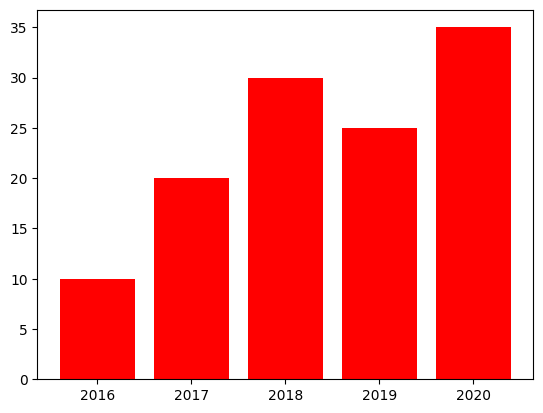

In [18]:
plt.bar(labels, values, color="red")

<BarContainer object of 5 artists>

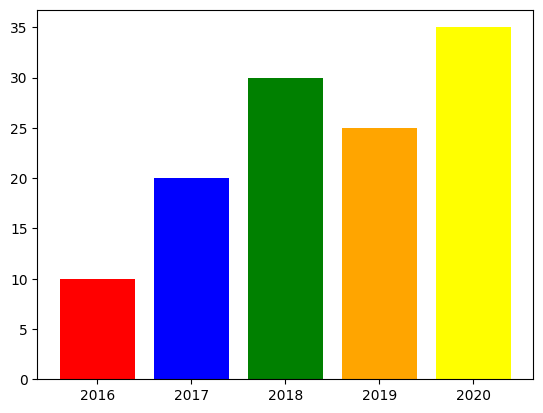

In [19]:
colors = ["red", "blue", "green", "orange", "yellow"]
plt.bar(labels, values, color=colors)

<BarContainer object of 5 artists>

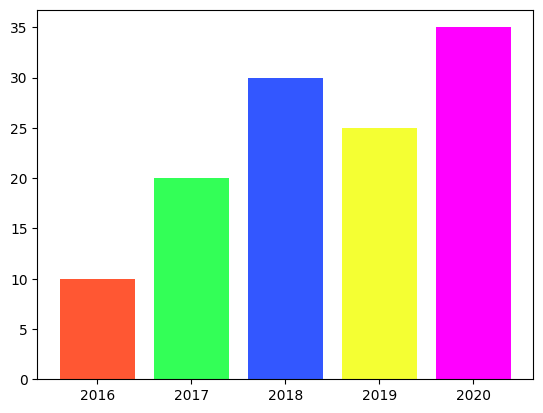

In [22]:
colors = ["#FF5733", "#33FF57", "#3357FF", "#F4FF33", "#FF00FF"]
plt.bar(labels, values, color=colors)

<BarContainer object of 5 artists>

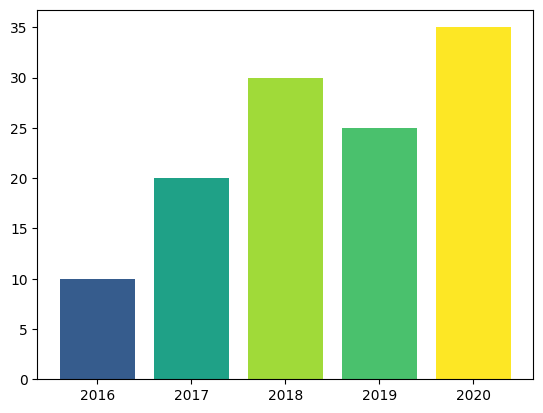

In [24]:
cmap = plt.get_cmap('viridis')

colors = [cmap(i / max(values)) for i in values]

plt.bar(labels, values, color=colors)

<BarContainer object of 5 artists>

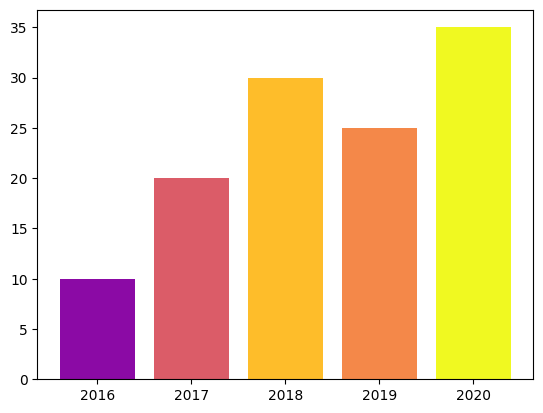

In [25]:
cmap = plt.get_cmap('plasma')

colors = [cmap(i / max(values)) for i in values]

plt.bar(labels, values, color=colors)

<BarContainer object of 5 artists>

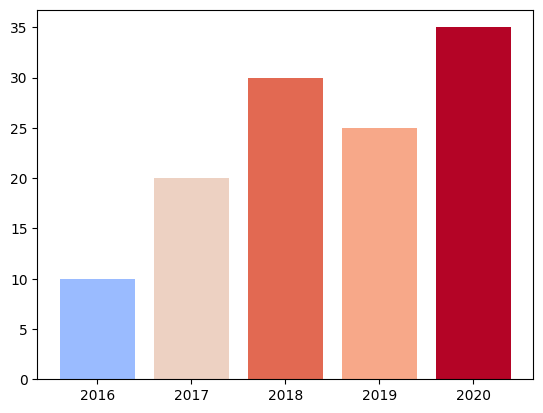

In [26]:
cmap = plt.get_cmap('coolwarm')

colors = [cmap(i / max(values)) for i in values]

plt.bar(labels, values, color=colors)

<BarContainer object of 5 artists>

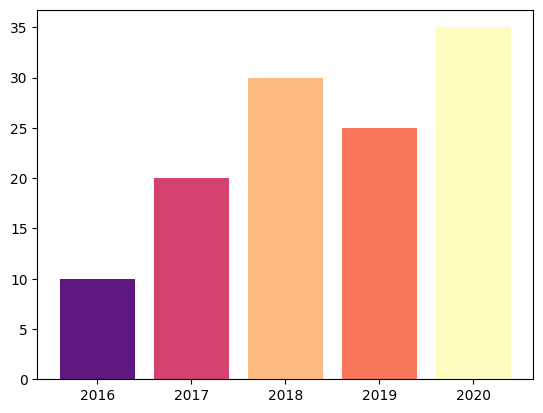

In [27]:
cmap = plt.get_cmap('magma')

colors = [cmap(i / max(values)) for i in values]

plt.bar(labels, values, color=colors)

Text(0, 0.5, 'Wartości Y')

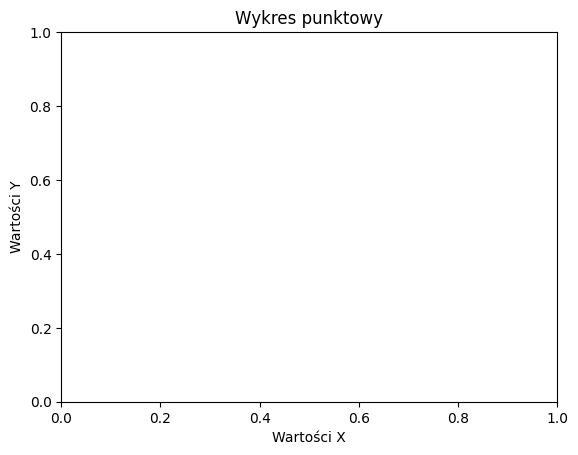

In [28]:
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

plt.title("Wykres punktowy")
plt.xlabel("Wartości X")
plt.ylabel('Wartości Y')

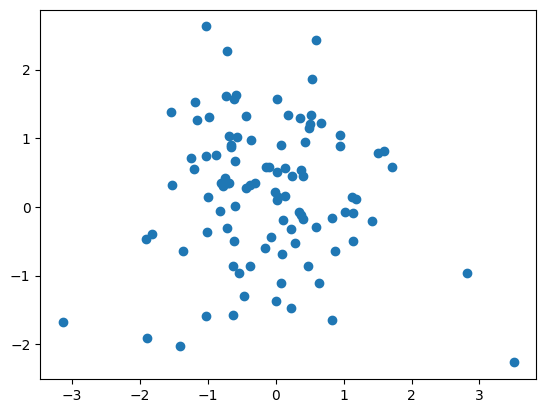

In [29]:
plt.scatter(x, y)

Text(0, 0.5, 'Oś Y')

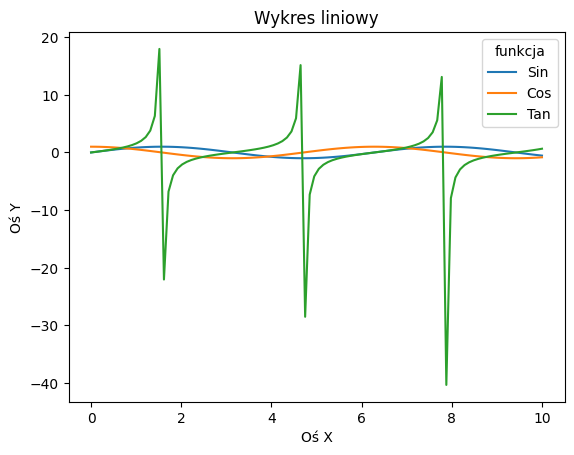

In [31]:
x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.plot(x, y1, label="Sin")
plt.plot(x, y2, label="Cos")
plt.plot(x, y3, label="Tan")

plt.legend(title="funkcja", loc='upper right')

plt.title("Wykres liniowy")
plt.xlabel("Oś X")
plt.ylabel("Oś Y")


Text(0, 0.5, 'Wartośći')

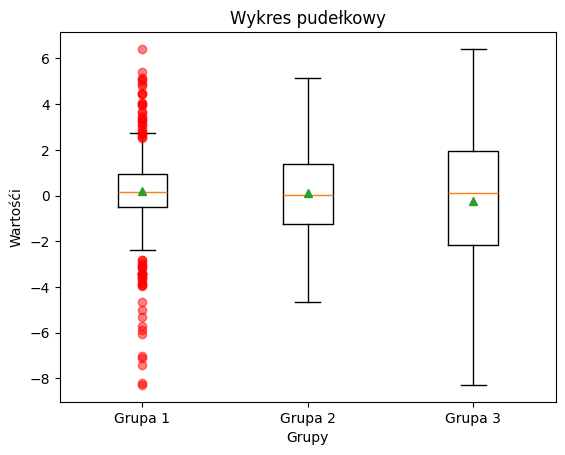

In [35]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

labels = ["Grupa 1", "Grupa 2", 'Grupa 3']

plt.boxplot(data, tick_labels=labels, showmeans=True)

outliers = [y for x in data for y in x if y < -2.5 or y > 2.5]
plt.plot(np.ones(len(outliers)), outliers, "ro", alpha=0.5)
# "ro" - r -> red -> o circle markers -> okrągłę znaczniki
plt.title("Wykres pudełkowy")
plt.xlabel("Grupy")
plt.ylabel(("Wartośći"))

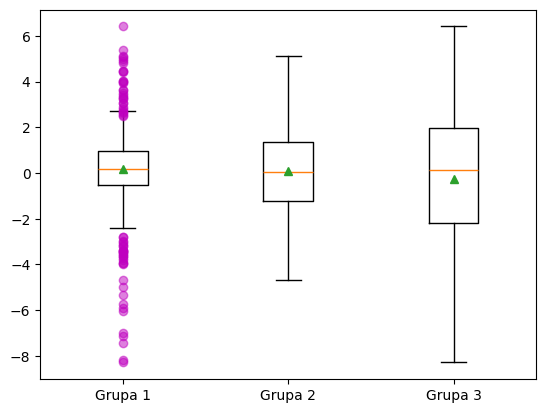

In [36]:
plt.boxplot(data, tick_labels=labels, showmeans=True)

outliers = [y for x in data for y in x if y < -2.5 or y > 2.5]
plt.plot(np.ones(len(outliers)), outliers, "mo", alpha=0.5)

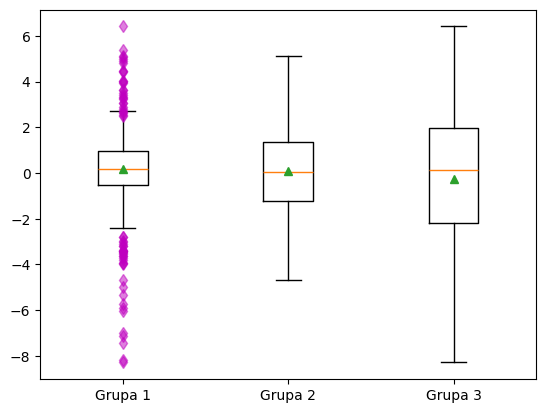

In [37]:
plt.boxplot(data, tick_labels=labels, showmeans=True)

outliers = [y for x in data for y in x if y < -2.5 or y > 2.5]
plt.plot(np.ones(len(outliers)), outliers, "md", alpha=0.5)

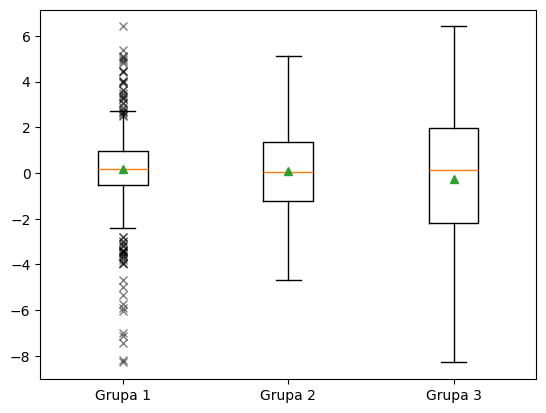

In [38]:
plt.boxplot(data, tick_labels=labels, showmeans=True)

outliers = [y for x in data for y in x if y < -2.5 or y > 2.5]
plt.plot(np.ones(len(outliers)), outliers, "kx", alpha=0.5)

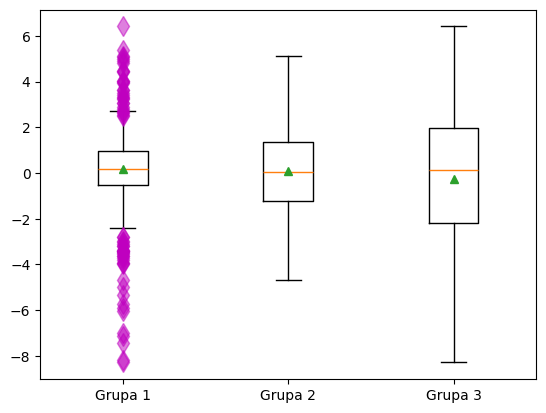

In [40]:
plt.boxplot(data, tick_labels=labels, showmeans=True)

outliers = [y for x in data for y in x if y < -2.5 or y > 2.5]
plt.plot(np.ones(len(outliers)), outliers, "md", markersize=10, alpha=0.5)

Text(0.5, 0.92, 'Wykres powierzchniowy')

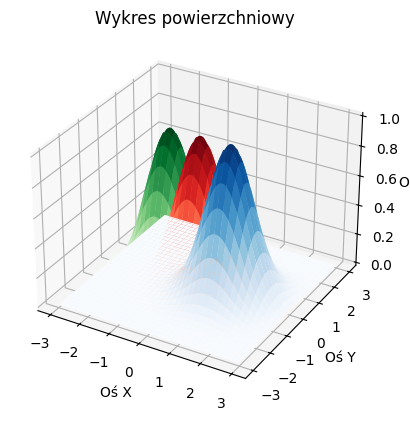

In [41]:
x = np.linspace(-3, 3, 101)
y = np.linspace(-3, 3, 101)

X, Y = np.meshgrid(x, y)

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - Y**2)
Z3 = np.exp(-(X+1)**2 - Y**2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z1, cmap="Reds")
ax.plot_surface(X, Y, Z2, cmap='Blues')
ax.plot_surface(X, Y, Z3, cmap='Greens')

ax.set_xlabel("Oś X")
ax.set_ylabel("Oś Y")
ax.set_zlabel("Oś Z")

ax.set_title("Wykres powierzchniowy")



Text(0.5, 1.0, 'Wykres Violinowy')

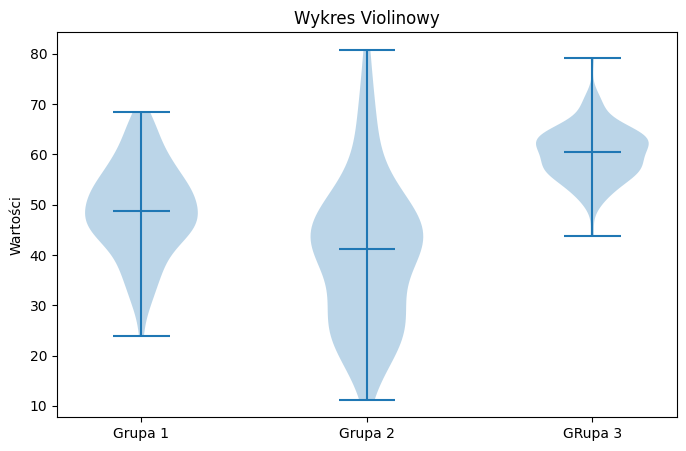

In [42]:
np.random.seed(42)
data1 = np.random.normal(50, 10 , 100)
data2 = np.random.normal(40, 15, 100)
data3 = np.random.normal(60, 5, 100)

plt.figure(figsize=(8, 5))
plt.violinplot([data1, data2, data3], showmedians=True)

plt.xticks([1,2,3], ["Grupa 1", 'Grupa 2', "GRupa 3"])
plt.ylabel("Wartości")
plt.title("Wykres Violinowy")

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7e4178c073d0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7e41790f4e10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7e41790f7a90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7e4176f4d290>,
 'cbars': <matplotlib.collections.LineCollection at 0x7e4176fd9450>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7e4176fd8b50>}

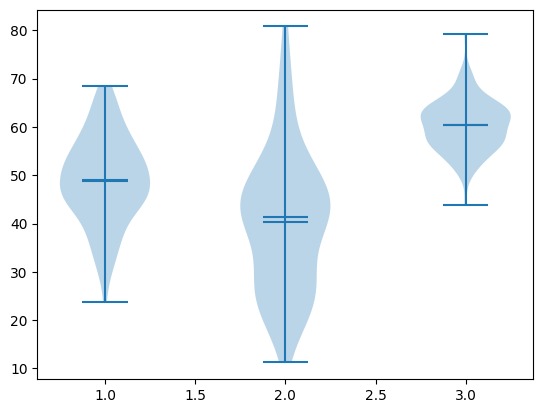

In [43]:
plt.violinplot([data1, data2, data3], showmedians=True,
               showmeans=True,
               showextrema=True)


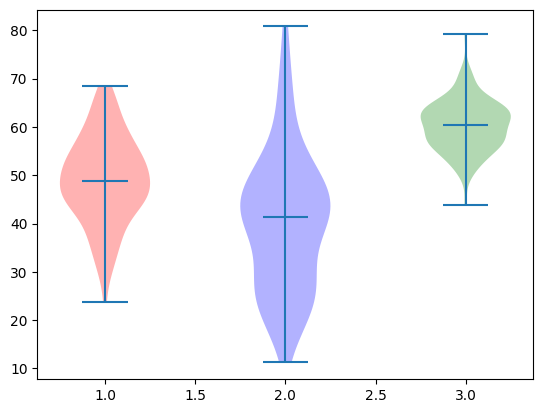

In [45]:

parts =  plt.violinplot([data1, data2, data3], showmedians=True)

colors = ["red", "blue", "green"]
for i, pc in enumerate(parts["bodies"]):
    pc.set_facecolor(colors[i])



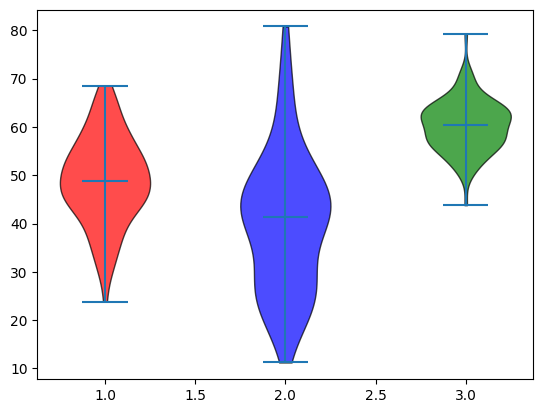

In [47]:
parts =  plt.violinplot([data1, data2, data3], showmedians=True)

colors = ["red", "blue", "green"]
for i, pc in enumerate(parts["bodies"]):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor("black")
    pc.set_alpha(0.7)

# **Plotly**


In [48]:
import plotly.graph_objects as go

In [49]:
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 18]

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="lines+markers", name="Dane", line=dict(color="blue")))
fig.update_layout(title="Wykres liniowy (Plotly)",
                  xaxis_title="Oś X",
                  yaxis_title="Oś Y")

fig.show()

In [52]:
import plotly.express as px

kategorie = ["A", "B", "C", "D"]
wartosci = [23, 17, 35, 29]

fig = px.bar(x=kategorie, y=wartosci, text=wartosci, color=kategorie,
             labels={"x":"Kategoria", "y": "Wartość"},
             title="Wykres słupkowy")

fig.show()

In [53]:
import numpy as np

data = np.random.rand(10, 10)

fig = px.imshow(data, color_continuous_scale="viridis", title="Heatmapa")

fig.show()

In [54]:
import plotly.graph_objects as go
import numpy as np

np.random.seed(42)
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)



In [55]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color=z, colorscale='Viridis'))])
fig.update_layout(title="Wykres 3d")

fig.show()


In [57]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "x": list(range(10)) * 3,
    "y": [i + j for j in range(3) for i in range(10)],
    "frame": [j for j in range(3) for _ in range(10)]
})

fig = px.line(df, x="x", y="y", animation_frame="frame", title="Animowany wykres w Plotly")

fig.show()

In [78]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="lines+markers", name="Sin(x)",
                         line=dict(color="blue", width=3, dash="dash"),
                         marker=dict(size=8, color="red", symbol="circle-open")))

fig.update_layout(title="Wykres Liniowy",
                  title_font=dict(size=20, color="black", family="Arial"),
                  xaxis_title="Oś X", yaxis_title="Oś Y",
                  xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor="gray",
                             zeroline=True, zerolinewidth=2, zerolinecolor="black"),
                  yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor="gray"),
                  plot_bgcolor="rgba(240,240,240,0.9)",
                  paper_bgcolor="white",
                  legend=dict(x=0, y=1, bgcolor="rgba(255,255,255,0.8)", bordercolor="black", borderwidth=1))

fig.add_annotation(x=5, y=0, text="Punkt środkowy", showarrow=True, arrowhead=2,
                   arrowcolor="black", font=dict(size=12, color="black"))

fig.update_layout(updatemenus=[dict(type="buttons",
                                    showactive=True,
                                    buttons=[dict(label="Linia",
                                                  method="update",
                                                  args=[{"visible": [True]}]),
                                                  dict(label="Ukryj",
                                                       method="update",
                                                       args=[{"visible":[False]}])
                                                  ])])
fig.show()

# **seaborn**

<ipython-input-90-4e99cd9956a1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




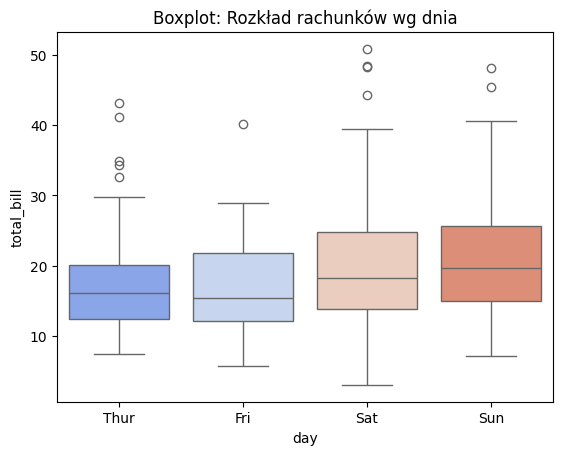

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

sns.boxplot(x="day", y="total_bill", data=tips, palette="coolwarm")

plt.title("Boxplot: Rozkład rachunków wg dnia")
plt.show()

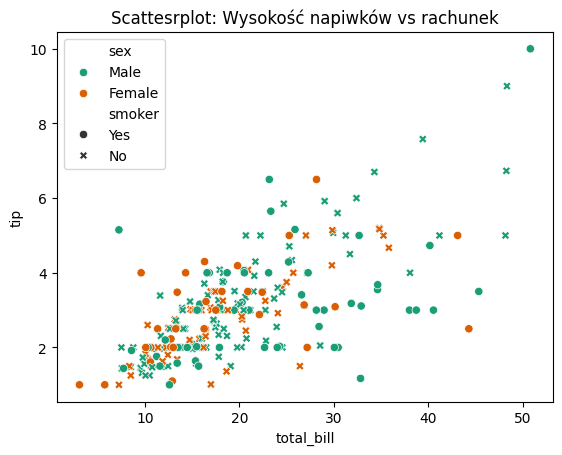

In [81]:
sns.scatterplot(x="total_bill", y="tip", hue="sex", style="smoker", data=tips, palette="Dark2")
plt.title("Scattesrplot: Wysokość napiwków vs rachunek")

plt.show()

<ipython-input-84-23dc6a63ea00>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




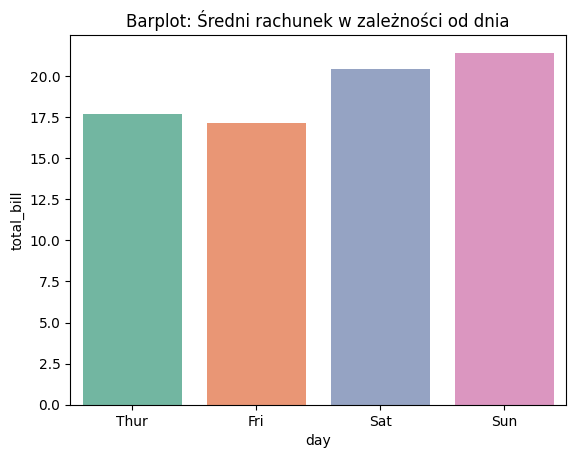

In [84]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=None, palette="Set2")
plt.title("Barplot: Średni rachunek w zależności od dnia")
plt.show()

Text(0.5, 1.0, 'Violin Plot: Rozkład rachunków w zależności od dnia i płci')

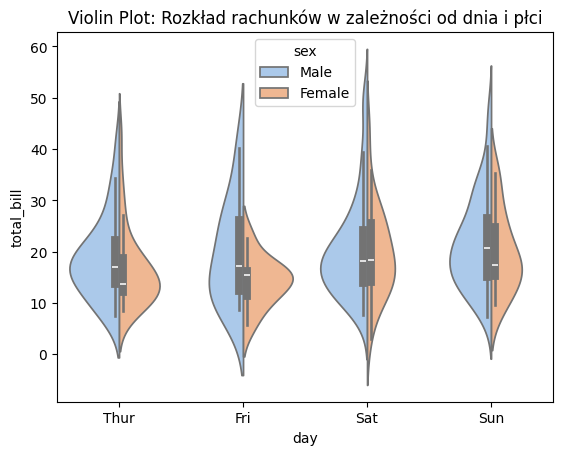

In [86]:
sns.violinplot(x="day", y="total_bill", hue="sex", split=True, data=tips, palette="pastel")
plt.title("Violin Plot: Rozkład rachunków w zależności od dnia i płci")

Text(0.5, 1.0, 'Lineplot: Liczba pasażerów w latach')

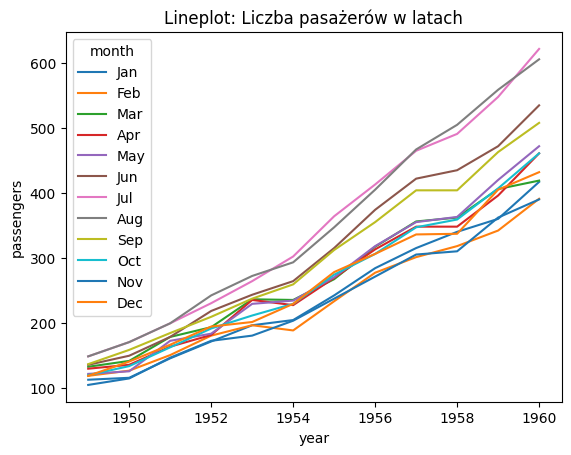

In [88]:
flights = sns.load_dataset("flights")
sns.lineplot(x="year", y="passengers", data=flights, hue="month", palette="tab10")
plt.title("Lineplot: Liczba pasażerów w latach")

Text(0.5, 1.0, "Heatmapa: Korelacja pomięzy zmmiennymi w zbiorze 'tips'")

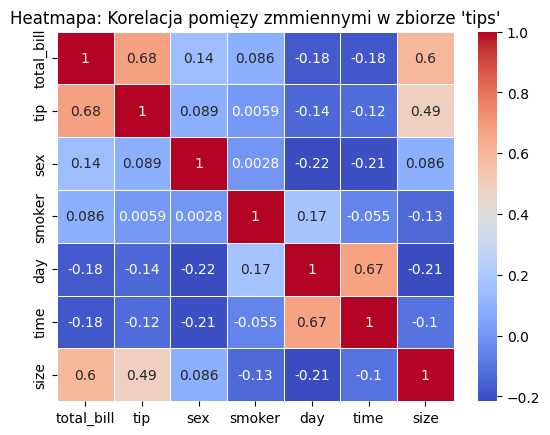

In [95]:
import numpy as np

tips = sns.load_dataset("tips")

tips_encoded = tips.copy()
for col in tips.select_dtypes(include=["object", "category"]).columns:
    tips_encoded[col] = pd.factorize(tips[col])[0]  # Zamiana na liczby

corr = tips_encoded.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmapa: Korelacja pomięzy zmmiennymi w zbiorze 'tips'")